In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()

df = pd.DataFrame({'column_name': ['사과가 맛있는 바나나는 노랗다', '바나나가 맛있는 사과는 빨갛다']})
df['column_name_words'] = df['column_name'].apply(lambda x: [word for word, pos in komoran.pos(x) if pos.startswith('N') | pos.startswith('V')])
df = df.explode('column_name_words')
df_word_count = df['column_name_words'].value_counts().reset_index()
df_word_count.columns = ['word', 'count']
print(df_word_count)

  word  count
0   사과      2
1   맛있      2
2  바나나      2
3   노랗      1
4   빨갛      1


In [ ]:
df_name_10 = pd.read_excel('/content/name_10.xlsx', index_col = None)
df_name_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     11960 non-null  object
 1   name     11960 non-null  object
 2   title    11960 non-null  object
 3   content  11959 non-null  object
dtypes: object(4)
memory usage: 373.9+ KB


In [ ]:
df_name_10.head()

,date,name,title,content
0,2018-01-01,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...
1,2018-01-01,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...
2,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...
3,2018-01-01,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...
4,2018-01-01,아시아경제,지난달(12월) 아파트 매매 실거래가,작년 12월 아파트 매매 실거래가는 다음과 같다.서울지역의 아파트 매매가를 살펴보면...


In [ ]:
df_name_10.insert(1, 'year', pd.to_datetime(df_name_10['date']))
df_name_10

,date,year,name,title,content
0,2018-01-01,2018-01-01,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...
1,2018-01-01,2018-01-01,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...
2,2018-01-01,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...
3,2018-01-01,2018-01-01,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...
4,2018-01-01,2018-01-01,아시아경제,지난달(12월) 아파트 매매 실거래가,작년 12월 아파트 매매 실거래가는 다음과 같다.서울지역의 아파트 매매가를 살펴보면...
...,...,...,...,...,...
11955,2022-12-31,2022-12-31,조선비즈,[2023 부스트라다무스]② 채상욱 “손흥민처럼 ‘양발 전략’ 써라... 타이밍·가...,“부동산 투자자의 상당수가 타이밍(시점) 전략에만 함몰돼 있어요. 이...
11956,2022-12-31,2022-12-31,헤럴드경제,유찰 또 유찰…“찬바람 경매 법정 삼수는 기본입니다” [부동산360],"12월 서울 아파트 낙찰가율 76.5%경기 73.7%, 인천 68.0%까지 하락8개..."
11957,2022-12-31,2022-12-31,아시아경제,"서울 아파트 매매가격, 9년 만에 약세로 마무리","부동산R114, 수도권 주택가격 동향[이미지출처=연합뉴스]서울 아파트 매매가격이 마..."
11958,2022-12-31,2022-12-31,헤럴드경제,20억 두고 ‘일진일퇴’ 잠실 엘리트…“19억대 매물 이제 안보여요” [부동산360],"잠실엘스 전용 84㎡, 19억~21억선 거래리센츠도 비슷…최고가 대비 7억원 빠져‘..."


In [ ]:
df_name_10['year'] = df_name_10['year'].dt.year
df_name_10.head()

,date,year,name,title,content
0,2018-01-01,2018,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...
1,2018-01-01,2018,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...
2,2018-01-01,2018,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...
3,2018-01-01,2018,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...
4,2018-01-01,2018,아시아경제,지난달(12월) 아파트 매매 실거래가,작년 12월 아파트 매매 실거래가는 다음과 같다.서울지역의 아파트 매매가를 살펴보면...


In [ ]:
df_20 = df_name_10[df_name_10['year'] == 2020]
df_20.head()

,date,year,name,title,content
5828,2020-01-01,2020,아시아경제,지난달(12월) 아파트 매매 실거래가,작년 12월 아파트 매매 실거래가는 다음과 같다.서울지역의 아파트 매매가를 살펴보면...
5829,2020-01-01,2020,서울경제,12·16대책 전 한달간 서울 아파트값 1.24% 상승,[서울경제] 12·16 대책 시행 전 한 달여 동안 서울 아파트 매매가격이 1.24...
5830,2020-01-02,2020,한국경제,9억원 미만 '규제 풍선효과'…경기·인천 아파트값 급등세 지속,한국감정원 주간 시세수원 영통 0.81% '최고 상승률'서울 양천구 전셋값 0.61...
5831,2020-01-02,2020,이데일리,주택 규제하니 오피스텔 ‘꿈틀’…서울 오피스텔 매매가↑,한국감정원 작년 4분기 오피스텔 가격동향조사전국 오피스텔 2019년 4분기 가격지수...
5832,2020-01-02,2020,머니투데이,'수원 영통구' 전국 주간 아파트 상승률 1위...까닭은,[머니투데이 조한송 기자] [전국 아파트 매매가격 변동률 전주 대비 0.09% 상승...


In [ ]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 5828 to 8175
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     2348 non-null   object
 1   year     2348 non-null   int64 
 2   name     2348 non-null   object
 3   title    2348 non-null   object
 4   content  2348 non-null   object
dtypes: int64(1), object(4)
memory usage: 110.1+ KB


In [ ]:
df_20.reset_index(drop = True, inplace = True)

In [ ]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     2348 non-null   object
 1   year     2348 non-null   int64 
 2   name     2348 non-null   object
 3   title    2348 non-null   object
 4   content  2348 non-null   object
dtypes: int64(1), object(4)
memory usage: 91.8+ KB


In [ ]:
komoran = Komoran()

df_20['title_words'] = df_20['title'].apply(lambda x: [word for word, pos in komoran.pos(x) if pos.startswith('N') | pos.startswith('V')])
df_20_title_words = df_20.explode('title_words')
df_word_count = df_20_title_words['title_words'].value_counts().reset_index()
df_word_count.columns = ['word', 'count']
df_word_count

<ipython-input-41-401280950820>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['title_words'] = df_20['title'].apply(lambda x: [word for word, pos in komoran.pos(x) if pos.startswith('N') | pos.startswith('V')])


,word,count
0,아파트,1593
1,서울,1001
2,억,504
3,값,431
4,매매,403
...,...,...
2644,조항,1
2645,제한,1
2646,갚,1
2647,당장,1


In [ ]:
df_word_count[:50]

,word,count
0,아파트,1593
1,서울,1001
2,억,504
3,값,431
4,매매,403
5,상승,335
6,강남,281
7,전세,264
8,집값,225
9,주,207


In [ ]:
df_20.insert(2, 'month', pd.to_datetime(df_20['date']).dt.month)
df_20.head()

,date,year,month,name,title,content,title_words
0,2020-01-01,2020,1,아시아경제,지난달(12월) 아파트 매매 실거래가,작년 12월 아파트 매매 실거래가는 다음과 같다.서울지역의 아파트 매매가를 살펴보면...,"[지난달, 12월, 아파트, 매매, 실거래]"
1,2020-01-01,2020,1,서울경제,12·16대책 전 한달간 서울 아파트값 1.24% 상승,[서울경제] 12·16 대책 시행 전 한 달여 동안 서울 아파트 매매가격이 1.24...,"[대책, 달, 간, 서울, 아파트, 값, 상승]"
2,2020-01-02,2020,1,한국경제,9억원 미만 '규제 풍선효과'…경기·인천 아파트값 급등세 지속,한국감정원 주간 시세수원 영통 0.81% '최고 상승률'서울 양천구 전셋값 0.61...,"[억, 원, 미만, 규제, 풍선효과, 경기, 인천, 아파트, 값, 급등세, 지속]"
3,2020-01-02,2020,1,이데일리,주택 규제하니 오피스텔 ‘꿈틀’…서울 오피스텔 매매가↑,한국감정원 작년 4분기 오피스텔 가격동향조사전국 오피스텔 2019년 4분기 가격지수...,"[주택, 규제, 오피스텔, 서울, 오피스텔, 매매]"
4,2020-01-02,2020,1,머니투데이,'수원 영통구' 전국 주간 아파트 상승률 1위...까닭은,[머니투데이 조한송 기자] [전국 아파트 매매가격 변동률 전주 대비 0.09% 상승...,"[수원, 영통구, 전국, 주간, 아파트, 상승, 위, 까닭]"


In [ ]:
from konlpy.tag import Kkma

# 데이터 다시 불러오기
df_news = pd.read_csv(f'{keyword}s.csv', encoding = 'utf-8-sig')
kkma = Kkma()
# 생성된 데이터 프레임을 딕셔너리로 변환 (단어, 빈도 꼴)
k_titles = df_news.reset_index(drop=True)['description'].tolist()
k_title = []

# NaN 필터링
for i in k_titles:
    if type(i) == str:
        j = kkma.nouns(i)   # 한국어 형태소만 추출
        k_title.extend(j)
    else:
        continue

temp = pd.Series(k_title).value_counts()
# wc = temp
wc = temp[ (temp > 5) & (temp.index.str.len() > 1) ]

# WordCloud 객체 생성 
wordCloud = WordCloud(
    font_path = "NanumBarunGothic", # 폰트 지정
    width = 400, # 워드 클라우드의 너비 지정
    height = 400, # 워드클라우드의 높이 지정
    max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
    background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc) # 워드 클라우드 빈도수 지정

plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [ ]:
from collections import Counter

def count_words(text):
    morphs = okt.morphs(text)
    count_dict = Counter(morphs)  # Counter 클래스 사용
    return count_dict

# 형태소 분석 결과를 저장할 리스트
morphs_list = []

# 데이터프레임의 각 행을 반복하며 형태소 분석을 수행
for index, row in df.iterrows():
    text = row['title']  # 텍스트 데이터가 저장된 열의 이름에 맞게 수정하세요
    morphs_dict = count_words(text)
    morphs_list.append(morphs_dict)

# 모든 단어의 빈도수를 합산한 딕셔너리 생성
total_count = Counter()
for morphs_dict in morphs_list:
    total_count.update(morphs_dict)

# 결과 출력하기
for word, count in sorted(total_count.items(), key=lambda x: x[1],reverse=True):
    if count >= 10:
        print(word + ':', count)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_all = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/total.xlsx', index_col = None)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     26536 non-null  object
 1   name     26536 non-null  object
 2   title    26536 non-null  object
 3   content  26535 non-null  object
dtypes: object(4)
memory usage: 829.4+ KB


In [ ]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all.head()

,date,name,title,content
0,2018-01-01,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...
1,2018-01-01,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...
2,2018-01-01,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...
3,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...
4,2018-01-01,스포츠서울,"[부동산 理實直告]아파트,관리비예치금과 장기수선충담금은 계륵?",[스포츠서울]일반적으로 부동산을 거래한다는 것은 매매계약을 말한다. 하지만 임대차계...


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     26536 non-null  datetime64[ns]
 1   name     26536 non-null  object        
 2   title    26536 non-null  object        
 3   content  26535 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 829.4+ KB


In [ ]:
df_2018 = df_all[df_all['date'].dt.year == 2018]
df_2018.head()

,date,name,title,content
0,2018-01-01,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...
1,2018-01-01,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...
2,2018-01-01,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...
3,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...
4,2018-01-01,스포츠서울,"[부동산 理實直告]아파트,관리비예치금과 장기수선충담금은 계륵?",[스포츠서울]일반적으로 부동산을 거래한다는 것은 매매계약을 말한다. 하지만 임대차계...


In [ ]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5930 entries, 0 to 5929
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     5930 non-null   datetime64[ns]
 1   name     5930 non-null   object        
 2   title    5930 non-null   object        
 3   content  5930 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 231.6+ KB


In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()

df_2018['title_words'] = df_2018['title'].apply(lambda x: [word for word, pos in komoran.pos(x) if pos.startswith('N') | pos.startswith('V')])
df_2018_title_words = df_2018.explode('title_words')
df_word_count_2018 = df_2018_title_words['title_words'].value_counts().reset_index()
df_word_count_2018.columns = ['word', 'count']
df_word_count_2018

<ipython-input-13-109e49dbf4f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['title_words'] = df_2018['title'].apply(lambda x: [word for word, pos in komoran.pos(x) if pos.startswith('N') | pos.startswith('V')])


,word,count
0,아파트,3779
1,서울,2197
2,값,1217
3,매매,1123
4,상승,730
...,...,...
4545,고래,1
4546,추월,1
4547,중인,1
4548,환제,1


In [ ]:
df_word_count_2018[:80]

,word,count
0,아파트,3779
1,서울,2197
2,값,1217
3,매매,1123
4,상승,730
...,...,...
75,세가,94
76,내,94
77,평균,93
78,높,92


In [ ]:
df_word_count_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    4550 non-null   object
 1   count   4550 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.2+ KB


In [ ]:
df_word_count_2018_top_50 = df_word_count_2018[:50]

In [ ]:
df_word_count_2018_dict = df_word_count_2018_top_50.set_index('word')['count'].to_dict()
df_word_count_2018_dict

{'아파트': 3779,
 '서울': 2197,
 '값': 1217,
 '매매': 1123,
 '상승': 730,
 '강남': 718,
 '주': 624,
 '하락': 593,
 '억': 553,
 '집값': 531,
 '거래': 520,
 '부동산': 460,
 '시장': 430,
 '주택': 415,
 '폭': 391,
 '만': 382,
 '재건축': 367,
 '가격': 357,
 '원': 343,
 '전세': 297,
 '오르': 262,
 '연속': 250,
 '대책': 248,
 '분양': 240,
 '이': 234,
 '단지': 233,
 '규제': 221,
 '년': 211,
 '집': 211,
 '개월': 199,
 '전국': 199,
 '전셋값': 198,
 '최근': 188,
 '최고': 186,
 '세': 180,
 '둔화': 178,
 '상승세': 176,
 '최대': 166,
 '대': 160,
 '중': 154,
 '역세권': 147,
 '시': 144,
 '대출': 143,
 '주간': 142,
 '거래량': 142,
 '인기': 142,
 '수도권': 141,
 '확대': 136,
 '지역': 129,
 '하락세': 128}

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

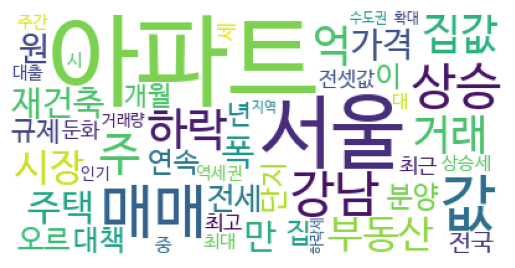

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white', font_path = "NanumBarunGothic")
cloud = wc.generate_from_frequencies(df_word_count_2018_dict)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()

df_all['title_words'] = df_all['title'].apply(lambda x: [word for word, pos in komoran.pos(x) if pos.startswith('N') | pos.startswith('V')])
df_all_title_words = df_all.explode('title_words')
df_word_count_all = df_all_title_words['title_words'].value_counts().reset_index()
df_word_count_all.columns = ['word', 'count']
df_word_count_all

,word,count
0,아파트,19036
1,서울,11661
2,값,5870
3,매매,5073
4,억,3907
...,...,...
8457,생사,1
8458,안갯속…,1
8459,웅동학원,1
8460,벽돌,1


In [ ]:
df_word_count_all[:50]

,word,count
0,아파트,19036
1,서울,11661
2,값,5870
3,매매,5073
4,억,3907
5,상승,3651
6,주,3169
7,하락,3127
8,강남,2514
9,집값,2386


In [ ]:
df_word_count_all.to_excel('/content/drive/MyDrive/Colab Notebooks/data/df_word_count_all.xlsx', index = False)

In [ ]:
# datetime 칼럼을 인덱스로 설정
df_2018.set_index('date', inplace=True)

# 2021년 1월 1일부터 2021년 3월 31일까지의 데이터 추출
start_date = '2018-01-01'
end_date = '2018-03-31'
df_subset = df_2018.loc[start_date:end_date]

In [ ]:
df_subset

,name,title,content,title_words
date,,,,
2018-01-01,연합뉴스,"""집 파느니 증여한다""…잇단 규제에 주택 매매↓, 증여↑",주택 증여 작년 11월까지 8만 건 육박…역대 최대 전망2년 연속 100만 건 넘었...,"[집, 팔, 증여, 잇달, 규제, 주택, 매매, 증여]"
2018-01-01,조선비즈,[아파트 별곡]① 자산증식 욕망이 불패 신기루 만들어…주거대안 화두에 진화 거듭,대한민국은 아파트 공화국이다. 우리나라 집 10채 중 6채는 아파트다. 아파트에 열...,"[아파트, 별곡, 자산, 증식, 욕망, 패, 신기루, 만들, 주거, 대안, 화두, 진화]"
2018-01-01,서울경제,"[2018년 주목! 여기] 4청량리 역세권, 교통망·주거환경 개선 동시에...일대 ...",경강선 이어 올 8월 분당선 연장집창촌은 도심 랜드마크 변신중미주 전용 86.78㎡...,"[2018년, 주목, 여기, 청량리, 역세권, 교통망, 주거, 환경, 개선, 동시,..."
2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 ...,"[서울, 아파트, 오르, 때, 지방, 하락]"
2018-01-01,스포츠서울,"[부동산 理實直告]아파트,관리비예치금과 장기수선충담금은 계륵?",[스포츠서울]일반적으로 부동산을 거래한다는 것은 매매계약을 말한다. 하지만 임대차계...,"[부동산, 아파트, 관리비, 예치금, 장기, 수선, 충담, 금, 계륵]"
...,...,...,...,...
2018-03-31,머니투데이,"김상곤 부총리, 강남 아파트 1.3억 싸게 팔고 양도세 '5억' 절세",[머니투데이 김사무엘 기자] [시세 25억원 '래미안대치팰리스' 23억7000만원에...,"[김상곤, 부총리, 강남, 아파트, 억, 싸, 팔, 도세, 억, 절세]"
2018-03-31,연합뉴스,"""전셋값 꺾였다지만…"" 지난달 시중은행 전세자금대출 50조 육박",여전히 높은 전셋값에 고강도 대출규제로 매매 수요까지 전세로 돌아선 영향 지난달 시...,"[전셋값, 꺾이, 지난달, 시중, 은행, 전세, 자금, 대출, 조, 육박]"
2018-03-31,매일경제,[MK 시황] 서울 매매 7주째 둔화…강남 아파트값 주춤,서울 잠실 아파트 단지 전경 [사진 이미연 기자] 서울 집값을 견인하던 강남권 아파...,"[시, 황, 서울, 매매, 주, 둔화, 강남, 아파트, 값]"
